# **Análisis Estadístico de Redes Sociales:** *Taller 1*

## Valentina Cardona Saldaña

In [1]:
# Paquetes
import pandas as pd
import numpy as np

import igraph as ig
import networkx as nx

import matplotlib.pyplot as plt

### Ejercicio 1
Reproducir los ejemplos 3.1, 3.2, 3.3, 4.2, 4.4 de [Gestión de datos relacionales](https://rpubs.com/jstats1702/931287) en Python usando igraph y/o NetworkX

#### 3.1 Ejemplo: Red binaria no dirigida

In [2]:
# red no dirigida
G1 = nx.Graph()
G1.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6), (4,7), (5,6), (6,7)])

In [3]:
# Clase de objeto
print(type(G1))

<class 'networkx.classes.graph.Graph'>


In [4]:
# Identificador
id(G1)

4575410416

In [5]:
# Vértices / Nodos
list(G1.nodes)

[1, 2, 3, 4, 5, 6, 7]

In [6]:
# Orden
## Número de nodos
print(G1.number_of_nodes())

## Otra forma
print(G1.order())

7
7


In [7]:
# Aristas
list(G1.edges)

[(1, 2),
 (1, 3),
 (2, 3),
 (2, 4),
 (3, 5),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 6),
 (6, 7)]

In [8]:
# Tamaño
## Número de aristas
print(G1.number_of_edges())

## Otra forma
print(G1.size())

10
10


In [9]:
# Aristas (otro formato) ??


In [10]:
# Ponderada?
nx.is_weighted(G1)

False

In [11]:
# Simple?
G1.is_multigraph()

False

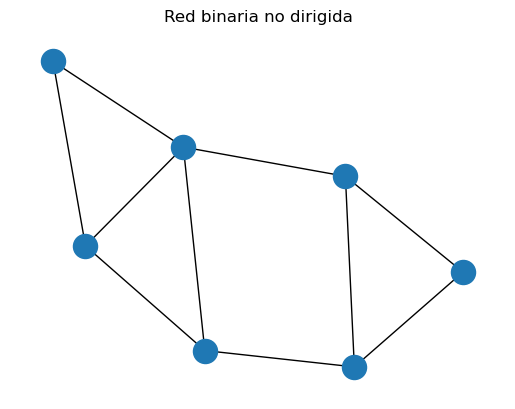

In [12]:
# Visualización

## Establecer la semilla
np.random.seed(21022024)

## Sin etiquetas (Por defecto)
plt.figure()
plt.title("Red binaria no dirigida")
nx.draw(G1)
plt.show()

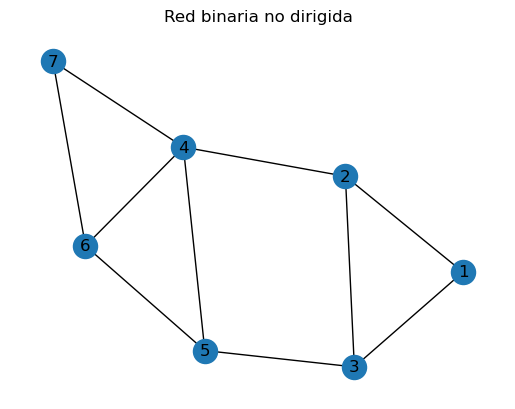

In [13]:
# Visualización

## Establecer la semilla
np.random.seed(21022024)

## Con etiquetas
plt.figure()
plt.title("Red binaria no dirigida")
nx.draw(G1, with_labels = True)
plt.show()

#### 3.2 Ejemplo: Red ponderada no dirigida

In [14]:
# red ponderada no dirigida
G2 = G1.copy()

## Establecer la semilla
np.random.seed(21022024)
## Establecer los pesos
weights = list(np.round(np.random.rand(G1.size()), 3))
## Iterar sobre las aristas del grafo y asignar los pesos
for i, edge in enumerate(G1.edges()):
    G2[edge[0]][edge[1]]['weight'] = weights[i]
    
## Verificación
G2.edges(data = 'weight')

EdgeDataView([(1, 2, 0.886), (1, 3, 0.514), (2, 3, 0.902), (2, 4, 0.434), (3, 5, 0.36), (4, 5, 0.579), (4, 6, 0.83), (4, 7, 0.932), (5, 6, 0.795), (6, 7, 0.282)])

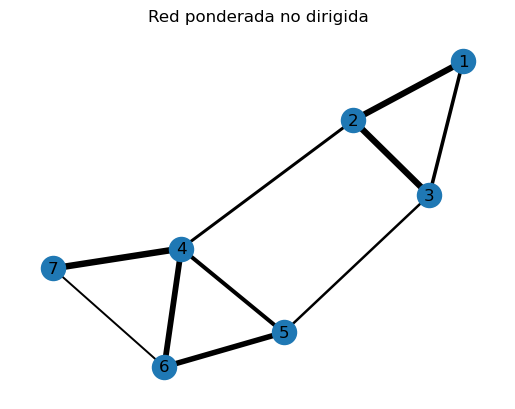

In [15]:
# Visualización

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
plt.title("Red ponderada no dirigida")
widths = nx.get_edge_attributes(G2, 'weight')
## Multiplica cada valor por 5
widths_scaled = [5 * width for width in widths.values()]
nx.draw(G2, with_labels = True, width = widths_scaled)
plt.show()

#### 3.3 Ejemplo: Red binaria dirigida

In [16]:
# red binaria dirigida
D1 = nx.DiGraph()
D1.add_edges_from([(1,2), (1,3), (2,3), (3,2)])

In [17]:
# Aristas
list(D1.edges())

[(1, 2), (1, 3), (2, 3), (3, 2)]

In [18]:
# Etiquetas
names = {1: "Juan", 2: "Maria", 3: "Pedro"}
nx.set_node_attributes(D1, names, "name")

# Atributo 'sexo' como atributo
sexo = {1: "M", 2: "F", 3: "M"}
nx.set_node_attributes(D1, sexo, "sexo")

# Aristas
print(D1.nodes(data = True))

[(1, {'name': 'Juan', 'sexo': 'M'}), (2, {'name': 'Maria', 'sexo': 'F'}), (3, {'name': 'Pedro', 'sexo': 'M'})]


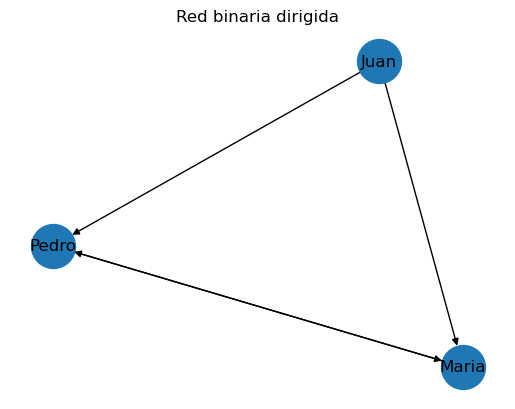

In [19]:
# Visualización

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
plt.title("Red binaria dirigida")
names = nx.get_node_attributes(D1, "name")
nx.draw(D1, labels = names, with_labels = True, node_size = 1000)
plt.show()

In [20]:
# Grado de entrada
dict(D1.in_degree())

{1: 0, 2: 2, 3: 2}

In [21]:
# Grado de salida
dict(D1.out_degree())

{1: 2, 2: 1, 3: 1}

#### 4.2 Ejemplo: Red binaria no dirigida

In [22]:
# red binaria no dirigida
G1 = nx.Graph()
G1.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6), (4,7), (5,6), (6,7)])

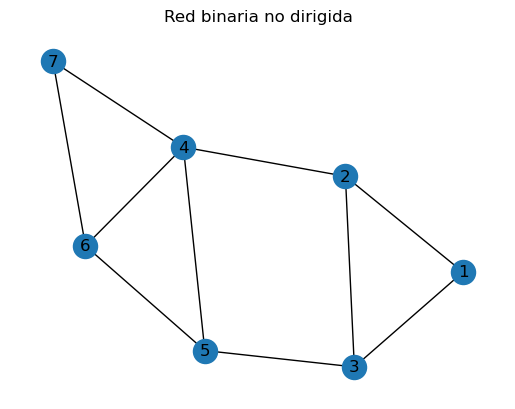

In [23]:
# Visualización

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
plt.title("Red binaria no dirigida")
nx.draw(G1, with_labels = True)
plt.show()

In [24]:
# Matriz de adyacencia
A = nx.adjacency_matrix(G1)

# Clase de objeto
type(A)

scipy.sparse._csr.csr_array

In [25]:
print(A)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 4)	1
  (3, 1)	1
  (3, 4)	1
  (3, 5)	1
  (3, 6)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1
  (5, 3)	1
  (5, 4)	1
  (5, 6)	1
  (6, 3)	1
  (6, 5)	1


In [26]:
# Convertir la matriz dispersa a una matriz densa
Y = A.todense()
## Otra forma
#Y = nx.to_numpy_array(G1)

# Clase de objeto
type(Y)

numpy.ndarray

In [27]:
# Simétrica?
np.array_equal(Y, Y.T)

True

In [28]:
print(Y)

[[0 1 1 0 0 0 0]
 [1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [0 1 0 0 1 1 1]
 [0 0 1 1 0 1 0]
 [0 0 0 1 1 0 1]
 [0 0 0 1 0 1 0]]


In [38]:
# Versión vectorizada exhaustiva
r = np.arange(len(Y))

mask = r[:,None]<r

## Triangular inferior
yvec1 = Y.T[mask]

print(yvec1)

[1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1]


In [42]:
# Versión vectorizada indexada
yvec2 = np.where(yvec1 == 1)

print(yvec2[0])

[ 0  1  6  7 12 15 16 17 18 20]


#### 4.4 Ejemplo: Red binaria no dirigida (cont.)

In [43]:
# Matriz de aristas
n = Y.shape[0]
A = []
for i in range(n-1):
    for j in range(i+1, n):
        if Y[i, j] == 1:
            A.append([i+1, j+1])  # Suma 1 a i y j para que los índices comiencen desde 1

A = np.array(A)

In [45]:
# Clase de objeto
type(A)

numpy.ndarray

In [44]:
print(A)

[[1 2]
 [1 3]
 [2 3]
 [2 4]
 [3 5]
 [4 5]
 [4 6]
 [4 7]
 [5 6]
 [6 7]]


### Ejercicio 2
Considere el grafo $G = (V,E)$, con

$V = \{1, 2, 3, 4, 5\}$ y $E = \{\{1, 2\}; \{1, 3\}; \{2, 3\}; \{2, 4\}; \{2, 5\}; \{3, 5\}; \{4, 5\}\}$.

(a) Visualizar G.

(b) Calcular el orden, el tamaño, y el diámetro del grafo.

(c) Calcular el grado de cada vértice.

(d) Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.

In [64]:
# Definir grafo
G3 = nx.Graph()
G3.add_nodes_from([1, 2, 3, 4, 5])
G3.add_edges_from([(1,2), (1,3), (2,3), (2,4), (2,5), (3,5), (4,5)])

print(G3.nodes())
print(G3.edges())

[1, 2, 3, 4, 5]
[(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5)]


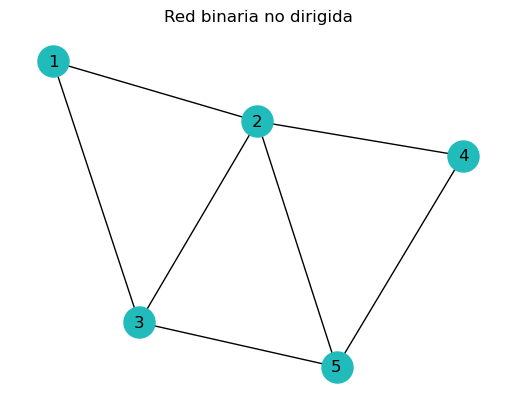

In [65]:
# (a) Visualizar G

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
plt.title("Red binaria no dirigida")
nx.draw(G3, with_labels = True, node_color = '#22bbbb', node_size = 500)
plt.show()

In [66]:
# (b) Calcular el orden, el tamaño, y el diámetro del grafo.

print("Orden del grafo: ", G3.order())
print("Tamaño del grafo: ", G3.size())
print("Diámetro del grafo: ", nx.diameter(G3))

Orden del grafo:  5
Tamaño del grafo:  7
Diámetro del grafo:  2


In [67]:
# (c) Calcular el grado de cada vértice.

#print(G3.degree())

for nodo, grado in G3.degree():
    print("El grado del nodo", nodo, "es:", grado)

El grado del nodo 1 es: 2
El grado del nodo 2 es: 4
El grado del nodo 3 es: 3
El grado del nodo 4 es: 2
El grado del nodo 5 es: 3


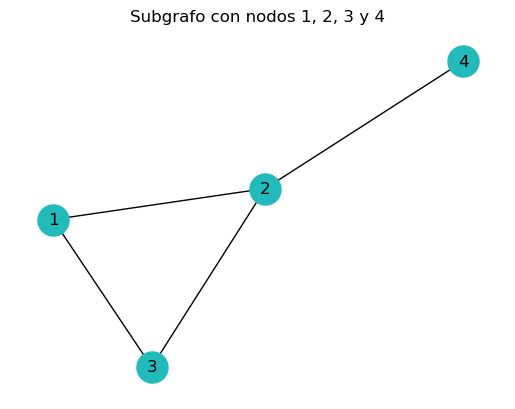

In [68]:
# (d) Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.

## Eliminar nodo 5
G3.remove_node(5)

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
plt.title("Subgrafo con nodos 1, 2, 3 y 4")
nx.draw(G3, with_labels = True, node_color = '#22bbbb', node_size = 500)
plt.show()

### Ejercicio 3
Considere el digrafo $G = (V,E)$, con

$V = \{1, 2, 3, 4, 5\}$ y $E = \{(1, 3); (2, 3); (2, 4); (2, 5); (3, 1); (3, 5); (4, 5); (5, 4)\}$.

(a) Visualizar G.

(b) Calcular el orden, el tamaño, y el diámetro del grafo.

(c) Calcular el grado de cada vértice del grafo.

(d) Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.

In [89]:
# Crear digrafo
D2 = nx.DiGraph()
D2.add_nodes_from([1, 2, 3, 4, 5])
D2.add_edges_from([(1,3), (2,3), (2,4), (2,5), (3,1), (3,5), (4,5), (5,4)])

print(D2.nodes())
print(D2.edges())

[1, 2, 3, 4, 5]
[(1, 3), (2, 3), (2, 4), (2, 5), (3, 1), (3, 5), (4, 5), (5, 4)]


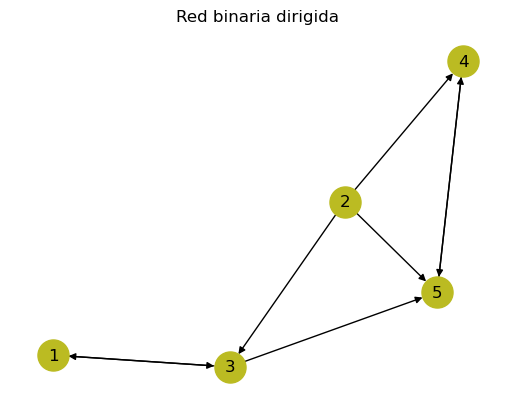

In [90]:
# (a) Visualizar G.

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
plt.title("Red binaria dirigida")
nx.draw(D2, with_labels = True, node_color = '#bbbb22', node_size = 500)
plt.show()

In [91]:
# (b) Calcular el orden, el tamaño, y el diámetro del grafo.
print("Orden del grafo: ", D2.order())
print("Tamaño del grafo: ", D2.size())

try:
    diametro = max(nx.diameter(D2.subgraph(c)) for c in nx.strongly_connected_components(D2))
except nx.NetworkXError:
    diametro = float('inf')
print("Diámetro del grafo: ", diametro)

Orden del grafo:  5
Tamaño del grafo:  8
Diámetro del grafo:  1


In [92]:
# (c) Calcular el grado de cada vértice del grafo.

## Calcular el grado de entrada y de salida de cada nodo
grado_entrada = dict(D2.in_degree())
grado_salida = dict(D2.out_degree())

## Imprimir los grados de cada nodo
for nodo in D2.nodes():
    grado_in = grado_entrada.get(nodo, 0)
    grado_out = grado_salida.get(nodo, 0)
    print("El nodo", nodo, "tiene grado de entrada:", grado_in, "y grado de salida:", grado_out)

El nodo 1 tiene grado de entrada: 1 y grado de salida: 1
El nodo 2 tiene grado de entrada: 0 y grado de salida: 3
El nodo 3 tiene grado de entrada: 2 y grado de salida: 2
El nodo 4 tiene grado de entrada: 2 y grado de salida: 1
El nodo 5 tiene grado de entrada: 3 y grado de salida: 1


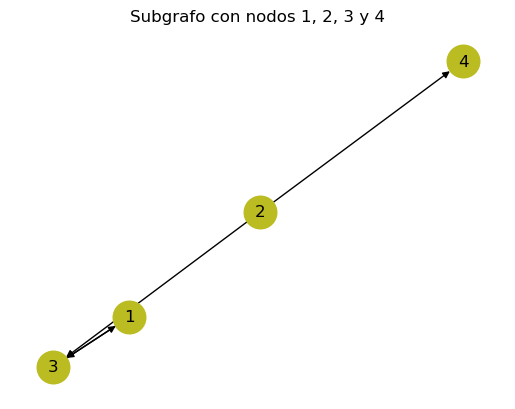

In [93]:
# (d) Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.

## Eliminar nodo 5
D2.remove_node(5)

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
plt.title("Subgrafo con nodos 1, 2, 3 y 4")
nx.draw(D2, with_labels = True, node_color = '#bbbb22', node_size = 500)
plt.show()

### Ejercicio 4 ??
Una triada es un subgrafo generado a partir de una tripla de vértices.

(a) Graficar todos los posibles estados triádicos no dirigidos.

(b) Identificar los estados isomorfos.

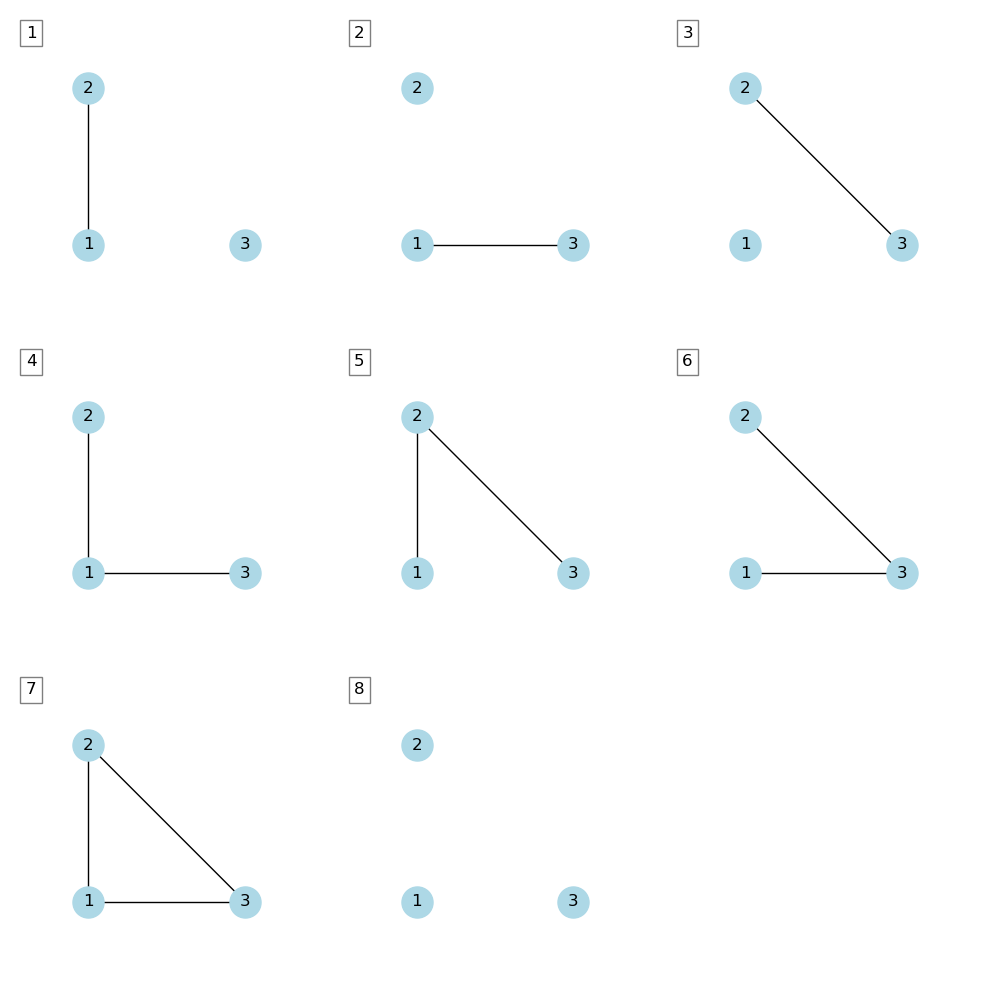

In [168]:
# (a) Graficar todos los posibles estados triádicos no dirigidos.

## Establecer la semilla
np.random.seed(21022024)

## Crear grafo con 3 nodos
G4 = nx.Graph()
G4.add_nodes_from([1, 2, 3])

## Definir la posición de los nodos
pos = {1: (0, 0), 2: (0, 1), 3: (1, 0)}

## Crear la figura y los ejes
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)

## Definir una función para dibujar la red en cada subfigura
def draw_graph(graph, ax, pos, **kwargs):
    ## Dibujar los nodos y las aristas
    nx.draw(graph, ax=ax, pos=pos, with_labels=True, node_color='lightblue', node_size=500, **kwargs)
    ## Limitar los ejes para que se ajusten al rectángulo
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)

## Dibujar cada configuración en una subfigura diferente
configurations = [
    [(1, 2)], 
    [(1, 3)], 
    [(2, 3)], 
    [(1, 2), (1, 3)], 
    [(2, 1), (2, 3)], 
    [(3, 1), (3, 2)], 
    [(1, 2), (1, 3), (2, 3)], 
    []
]

for i, config in enumerate(configurations):
    ## Agregar las aristas correspondientes
    G4.add_edges_from(config)
    ## Dibujar la red en la subfigura correspondiente, excepto para la última
    if i < 8:
        draw_graph(G4, ax=axes[i//3, i%3], pos=pos)
        ## Agregar el número de la subfigura en la esquina superior izquierda
        axes[i//3, i%3].text(0.05, 0.95, str(i+1), transform=axes[i//3, i%3].transAxes, fontsize=12,
                            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ## Remover las aristas para la próxima configuración
    G4.remove_edges_from(config)

## Eliminar los ejes para la última subfigura
axes[2, 2].axis('off')

## Mostrar el gráfico
plt.tight_layout()
plt.show()

In [175]:

# Inicializar una lista para almacenar los gráficos
graphs = []

# Generar los gráficos y agregarlos a la lista
for config in configurations:
    G = nx.Graph()
    G.add_edges_from(config)
    graphs.append(G)

# Determinar qué gráficos son isomorfos
for i in range(len(graphs)):
    for j in range(len(graphs)):
        if j > i and nx.is_isomorphic(graphs[i], graphs[j]):
            print(f"Los gráficos {i+1} y {j+1} son isomorfos.")

Los gráficos 1 y 2 son isomorfos.
Los gráficos 1 y 3 son isomorfos.
Los gráficos 2 y 3 son isomorfos.
Los gráficos 4 y 5 son isomorfos.
Los gráficos 4 y 6 son isomorfos.
Los gráficos 5 y 6 son isomorfos.


### Ejercicio 5??

Visualizar todos los grafos (no dirigidos) conectados con 4 vértices.

### Ejercicio 6
Escribir una rutina que reconstruya la matriz de adyacencia a partir de la matriz
de aristas y una lista de vértices.

(a) Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios independientes e idénticamente distribuidos con probabilidad de éxito 0.1.

(b) Probar la rutina con la red simulada.

(c) Visualizar la red simulada por medio de un grafo y una socio-matriz.

In [ ]:
# Función


In [196]:
# (a) Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios independientes e idénticamente distribuidos con probabilidad de éxito 0.1.

# Crear un grafo no dirigido
G6 = nx.Graph()
# Agregar 25 nodos al grafo
G6.add_nodes_from(range(25))

# Iterar sobre todas las parejas de nodos y agregar un enlace con la probabilidad dada
for i in range(25):
    for j in range(i+1, 25):
        if np.random.binomial(1, 0.1) == 1:
            G6.add_edge(i, j)

In [ ]:
# (b) Probar la rutina con la red simulada.


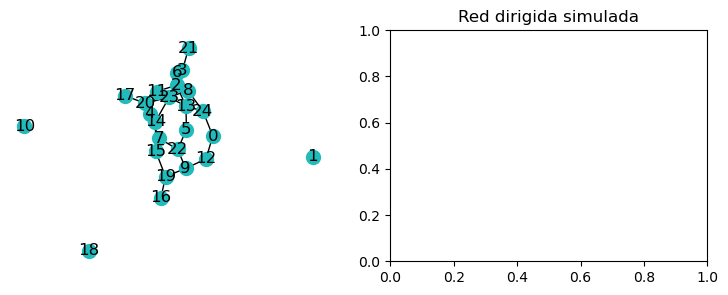

In [200]:
# (c) Visualizar la red simulada por medio de un grafo y una socio-matriz.

## Establecer la semilla
np.random.seed(21022024)

fig, axes = plt.subplots(1,2)
fig.set_size_inches(9,3)

plt.title("Red dirigida simulada")

# Grafo
nx.draw(G6, ax = axes[0], with_labels = True, node_color = '#22bbbb', node_size = 100)

# matriz de adyacencia
#corrplot::corrplot(corr = Y_lazega, method = "color", tl.col = "black", addgrid.col = "gray90", cl.pos = "n")

plt.show()

### Ejercicio 7
Escribir una rutina que reconstruya la matriz de aristas y la lista de vértices a partir de la matriz de adyacencia.

(a) Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios independientes e idénticamente distribuidos con probabilidad de éxito 0.1.

(b) Probar la rutina con la red simulada.

(c) Visualizar la red simulada por medio de un grafo y una socio-matriz.

### Ejercicio 8 ??
Escribir una rutina que simule redes tanto dirigidas como no dirigidas a partir de enlaces aleatorios independientes e idénticamente distribuidos con una probabilidad de éxito dada. Esta rutina debe tener como argumentos el orden de la red, la probabilidad de interacción (por defecto 0.5), el tipo de red (por defecto como no dirigida) y la semilla (por defecto 123), y además, tener como retorno una versión vectorizada de la matriz de adyacencia y una visualización. Probar esta rutina generando cuatro casos diferentes

### Ejercicio 9 ??
Considere el conjunto de datos dado en el archivo ```addhealth.RData``` disponible en la página web del curso. Estos datos fueron recopilados por *The National Longitudinal Study of Adolescent Health* y están asociados con un estudio escolar sobre salud y comportamientos sociales de adolescentes de varias escuelas en los Estados Unidos.
Los participantes nominaron hasta 5 niños y 5 niñas como amigos y reportaron el número de actividades extracurriculares en las que participaron juntos.

El archivo ```addhealth.RData``` contiene una lista con dos arreglos, ```X y E. X``` tiene tres campos: ```female``` (0 = No, 1 = Sí), ```race``` (1 = Blanco, 2 = Negro, 3 = Hispano, 4 = Otro) y ```grade``` (grado del estudiante). ```E``` también tiene tres campos: ```V1``` (vértice de salida) ```V2``` (vértice de llegada) y ```activities``` (número de actividades extracurriculares).

(a) Identificar y clasificar las variables nodales.

(b) Identificar y clasificar las variables relacionales.

(c) Calcular el orden, el tamaño, y el diámetro de la red.

(d) Visualizar la red sin tener en cuenta las variables nodales por medio de un grafo y una socio-matriz.

(e) Identificar el top 5 de los nodos más propensos a emitir/recibir relaciones.

### Ejercicio 10
Sintetizar y replicar la sección 2.4.2 (Special Types of Graphs, p. 24) de Kolaczyk and Csárdi (2020).